# **<center>Recognizing American Sign Language</center>**

<center><img src="https://miro.medium.com/max/696/0*vmgQDtKZthpE9Fel"/></center>

As we are aware, human interaction is affected by various health issues, and one such issue is deafness. With the advancement of Artificial Intelligence, we are witnessing the emergence of several solutions. In this notebook, our objective is to develop a Deep Learning model using the CNN Algorithm. This model is a crucial step in addressing the communication challenges caused by deafness.

### ***Note 1:***
The dataset used in this project consists of 25 labels instead of 26. This is because the letters 'J' and 'Z' require hand gestures for understanding. However, the dataset creator may have considered that the letter 'Z' has a distinctive appearance and can be easily identified. Hence, the dataset includes the letter 'Z' but excludes the letter 'J'.
### ***Note 2:***
It should be noted that this dataset contains a few incorrect labels. While the model rarely misclassifies images, the accuracy of the labeling can be confirmed by comparing it to the correct labeling mentioned below.

# **Installing the Required Libraries**

In case you have not installed the required libraries, you can do so by running the following code. If you already have the libraries installed, you can skip this step.

In [1]:
!pip3 install tensorflow
!pip3  install numpy
!pip3  install pandas
!pip3  install seaborn
!pip3  install matplotlib
!pip3  install pytorch
!pip3  install sklearn
!pip3  install mlxtend

     -------------------------------------- 272.8/272.8 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 9.2 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 8.8 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 15.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 13.6 MB/s eta 0:00:00
  Installing build dependencies: started
  In

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\jgera\AppData\Local\Temp\pip-install-nalb7lkq\pytorch_0a31a81c3bf546a9b4e7d8093160a9c8\setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  error: subprocess-exited-with-error
  
  × Running setup.py install for pytorch did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2951 sha256=312f4b166fbf5e47cb87d8246c5c215508be4406f1635591214b5b6f0971129a
  Stored in directory: c:\users\jgera\appdata\local\pip\cache\wheels\27\f0\d5\868338ffa491375e7d4416753ad008d35e2f48ee66e17e6b09
Successfully built sklearn
     ---------------------------------------- 1.4/1.4 MB 7.8 MB/s eta 0:00:00


# **Importing Libraries**

In [1]:
import numpy as np # linear algebra,math functions
import tensorflow as tf # tensorflow
import random # for seed value
import os # for folder functions
import string # for making alphabet labels as string
import pandas as pd # data processing
%matplotlib inline
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
for dirname, _, filenames in os.walk('/kaggle/input'): # default
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
seed=42
os.environ['PYTHONHASHSEED']=str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# We are using random seeds for controlling randomness.

# **Data Preprocessing**

In [3]:
train_data = pd.read_csv("C:/Users/jgera/OneDrive/Escritorio/Cetys/Repositorio_SI/SI23-BongoCat/proyecto_sign_language/dataset/sign_mnist_train/sign_mnist_train.csv")
test_data = pd.read_csv("C:/Users/jgera/OneDrive/Escritorio/Cetys/Repositorio_SI/SI23-BongoCat/proyecto_sign_language/dataset/sign_mnist_test/sign_mnist_test.csv")
team_data = pd.read_csv("C:/Users/jgera/OneDrive/Escritorio/Cetys/Repositorio_SI/SI23-BongoCat/proyecto_sign_language/dataset/sign_mnist_custom.csv")
print("Shape of train_data: ",train_data.shape,"Shape of test_data: ",test_data.shape,"Shape of team_data: ",team_data.shape)


Shape of train_data:  (27455, 785) Shape of test_data:  (7172, 785)


As we mentioned before, we neeed to delete the letter 'J' from the dataset due to the issue to represent the letter in a image. We will also create a list of the labels in the dataset.

In [5]:
strlabels=list(string.ascii_uppercase) # Appending alphabet to a list.
strlabels.remove("J") # Removing J letter because of the hand gesture problem.
print(strlabels) # Making a new list that contains letters for each indices.

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [6]:
train_labels=train_data["label"]
train_images=train_data.drop("label",axis=1).values # Dropping labels axis=1 > all column (axis=0 is all row)
test_labels=test_data["label"]
test_images=test_data.drop("label",axis=1).values # Dropping Labels axis=1 > all column (axis=0 is all row)
team_labels=team_data["label"]
team_images=team_data.drop("label",axis=1).values # Dropping Labels axis=1 > all column (axis=0 is all row)
                                               
train_images=train_images/255.0 # We are scaling our pixels between 0 and 1 for the sake of computing performance.
test_images=test_images/255.0
team_images=team_images/255.0

train_images=train_images.reshape(-1,28,28,1) # Reshaping for making images ready to go.
test_images=test_images.reshape(-1,28,28,1)
team_images=team_images.reshape(-1,28,28,1)
print(train_images.shape) # We have 27.455 images as 28x28x1 (2D Image with one channel)

(27455, 28, 28, 1)


# **Countplot of the Labels**

[Text(0, 0.5, 'Test Images'), Text(0.5, 0, 'Test Labels')]

<Figure size 640x480 with 0 Axes>

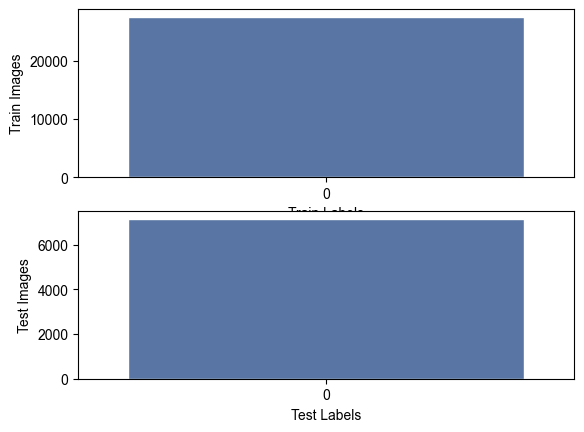

In [19]:
plt.figure() # Matplotlib for visualization.
plt.tight_layout() # Wide space for images.
fig,ax=plt.subplots(2,1) # Making space for 2 rows and 4 images for each row.
sns.set(rc={'figure.figsize':(15,5)}) # Size of images.
sns.countplot(train_labels,ax=ax[0])
ax[0].set(ylabel="Train Images", xlabel = "Train Labels") # Setting labels.
sns.countplot(test_labels,ax=ax[1])
ax[1].set(ylabel="Test Images", xlabel = "Test Labels") # Setting labels.

# **Load of 8 examples**

<Figure size 1500x500 with 0 Axes>

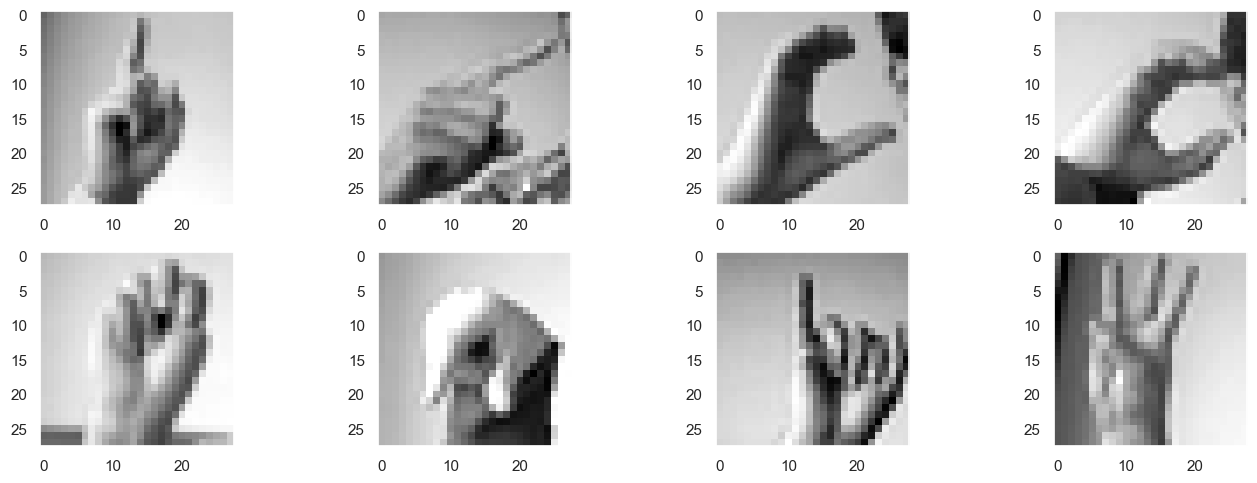

In [20]:
plt.figure() # Matplotlib for visualization.
f, graph = plt.subplots(2,4) # Making space for 2 rows and 4 images for each row.
f.set_size_inches(14, 5) # Size of images.
z=0
for i in range(2): # i for rows
    for k in range(4): # k for columns
        graph[i][k].imshow(train_images[z].reshape(28,28),cmap="gray") # Showing each train image.
        graph[i][k].grid(False) # Removing grids for each train image.
        z+=1
plt.tight_layout() # Wide space for images.
plt.show()

# **Building the CNN**

### **Building the CNN**

In [21]:
model=tf.keras.Sequential([ # Using tf.keras for build our sequential.
    tf.keras.layers.Conv2D(64,(3,3),padding="same",activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2),strides=2),
    
    tf.keras.layers.Dropout(0.2), # Dropping random 2% data out for learning variety.
    
    tf.keras.layers.Conv2D(32,(3,3),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2),strides=2),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(16,(3,3),padding="same",activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25,activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),loss="sparse_categorical_crossentropy",metrics=["acc"])
model.summary() # Summary of our model.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 32)      

### **Data Augmentation**

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
generator.fit(train_images)
# We use ImageDataGenerator for changing images randomly and train our model better.

### **Callbacks**

In [23]:
acc_treshold = 1.0 # Accuracy treshold.
class myCallback(tf.keras.callbacks.Callback):
    epc=0
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') >= acc_treshold-0.005 and logs.get('val_acc') >= acc_treshold):
            print("\nReached %2.2f%% accuracy !" %(logs.get('val_acc')*100)) # Printing accuracy as percentage.
            self.model.stop_training = True
            self.epc=epoch+1
callbacks = myCallback()
# We are using callbacks because we want to shut our training process down when it learns 100%.

# **Training the CNN**

In [24]:
#Hyperparameters
epochs=80
batch_size=128


history=model.fit(generator.flow(train_images,train_labels,batch_size),epochs=epochs,callbacks=[callbacks],validation_data=(test_images,test_labels),verbose=1)
# generator.flow() for applying data augmentation.
test_loss,test_acc=model.evaluate(test_images,test_labels) 
print("test acc:",test_acc)



Epoch 1/80
215/215 [==============================] - 66s 298ms/step - loss: 2.5313 - acc: 0.2524 - val_loss: 3.2388 - val_acc: 0.1095
Epoch 2/80
215/215 [==============================] - 90s 418ms/step - loss: 1.4027 - acc: 0.5506 - val_loss: 2.0633 - val_acc: 0.3627
Epoch 3/80
215/215 [==============================] - 70s 324ms/step - loss: 0.9508 - acc: 0.6827 - val_loss: 0.6594 - val_acc: 0.8249
Epoch 4/80
215/215 [==============================] - 78s 363ms/step - loss: 0.7136 - acc: 0.7614 - val_loss: 0.4301 - val_acc: 0.8571
Epoch 5/80
215/215 [==============================] - 73s 338ms/step - loss: 0.5535 - acc: 0.8131 - val_loss: 0.3151 - val_acc: 0.8954
Epoch 6/80
215/215 [==============================] - 72s 335ms/step - loss: 0.4408 - acc: 0.8528 - val_loss: 0.2706 - val_acc: 0.9102
Epoch 7/80
215/215 [==============================] - 81s 378ms/step - loss: 0.3673 - acc: 0.8790 - val_loss: 0.1933 - val_acc: 0.9321
Epoch 8/80
215/215 [==============================] - 8

In [28]:
prediction=model.predict(test_images) # Making predictions of test images with our model.
predictionTeam = model.predict(team_images) # Making predictions of team images with our model.

225/225 [==============================] - 4s 19ms/step


<Figure size 1500x500 with 0 Axes>

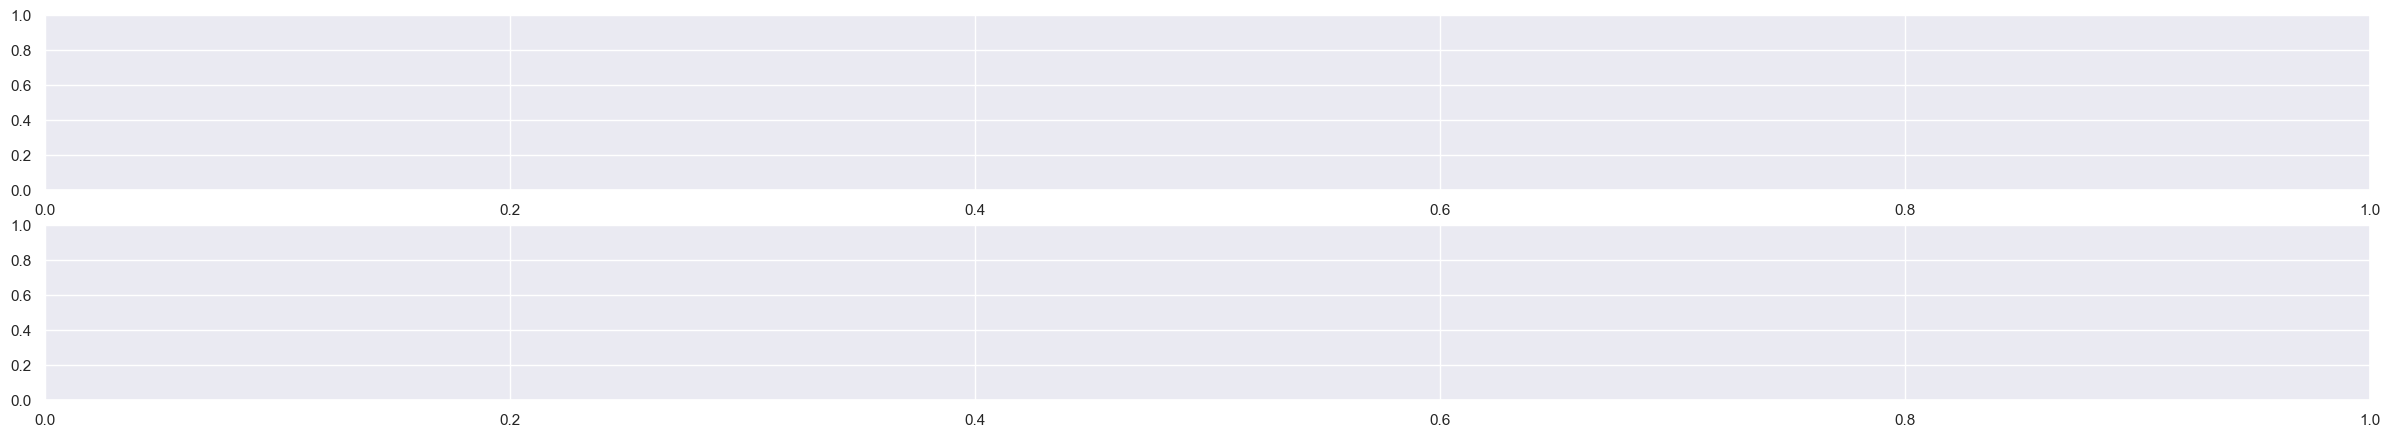

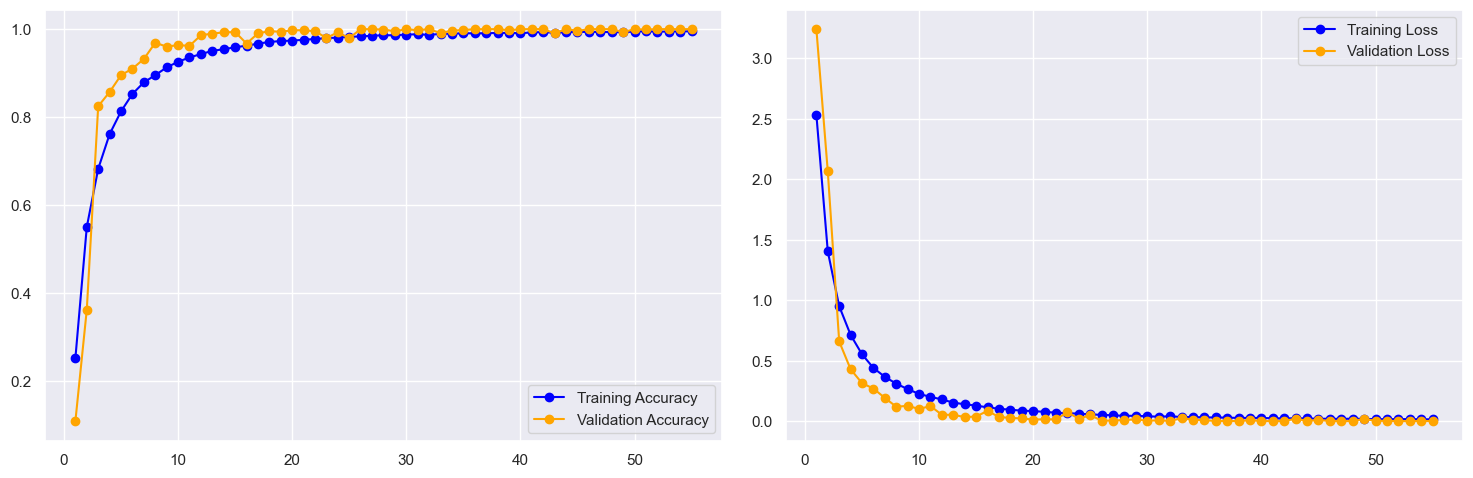

In [26]:
epoch_range=range(1,callbacks.epc+1 if callbacks.epc != 0 else epochs) # Epoch range for plotting our x-axis.
plt.figure() # Matplotlib for visualization.
fig,ax=plt.subplots(2,1) # Making space for 2 rows and 4 images for each row.
f, ax = plt.subplots(1,2) # Making space for 2 rows and 4 images for each row.
fig.set_size_inches(30, 5) # Size of images.
plt.tight_layout() # Wide space for images.
ax[0].plot(epoch_range,history.history["acc"],color="blue",marker="o")
ax[0].plot(epoch_range,history.history["val_acc"],color="orange",marker="o")
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
ax[1].plot(epoch_range,np.array(history.history["loss"]),color="blue",marker="o")
ax[1].plot(epoch_range,np.array(history.history["val_loss"]),color="orange",marker="o")
ax[1].legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [30]:
predictions=[]
predictionsTeam=[]
test_labels_string=[]
team_labels_string=[]
for i in range(0,test_labels.size):
    predictions.append(strlabels[np.argmax(prediction[i])]) # np.argmax() for taking highest value among the others.
    test_labels_string.append(strlabels[test_labels[i]])
for i in range(0,team_labels.size):
    predictionsTeam.append(strlabels[np.argmax(predictionTeam[i])]) # np.argmax() for taking highest value among the others.
    team_labels_string.append(strlabels[team_labels[i]])
# Converting predictions to letters.

# **Inference of the CNN**

Here we can test our CNN model with a random image from the test set. We can see that the model is able to predict the correct label for the image. We can also see the confidence score for the prediction. The confidence score is the probability of the image belonging to the predicted class. In this case, the confidence score is 1.0, which means that the model is 100% confident that the image belongs to the predicted class. This is because the model is trained on a small dataset and the image is from the test set.

Predicted: I 
Label: I


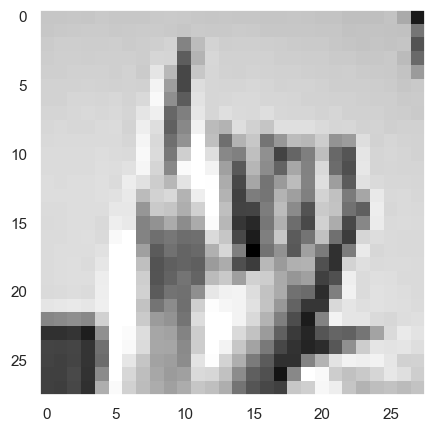

In [32]:
from numpy import random
n = int(random.randint(1,25))
plt.imshow(test_images[n].reshape(28,28),cmap="gray") # Showing images
plt.grid(False) # Removing grid for each image.
print("Predicted:",predictions[n],"\nLabel:",test_labels_string[n]) # Prediction - True Answer

In [ ]:
n = int(random.randint(1,25))
plt.imshow(team_images[n].reshape(28,28),cmap="gray") # Showing images
plt.grid(False) # Removing grid for each image.
print("Predicted:",predictionsTeam[n],"\nLabel:",team_labels_string[n]) # Prediction - True Answer